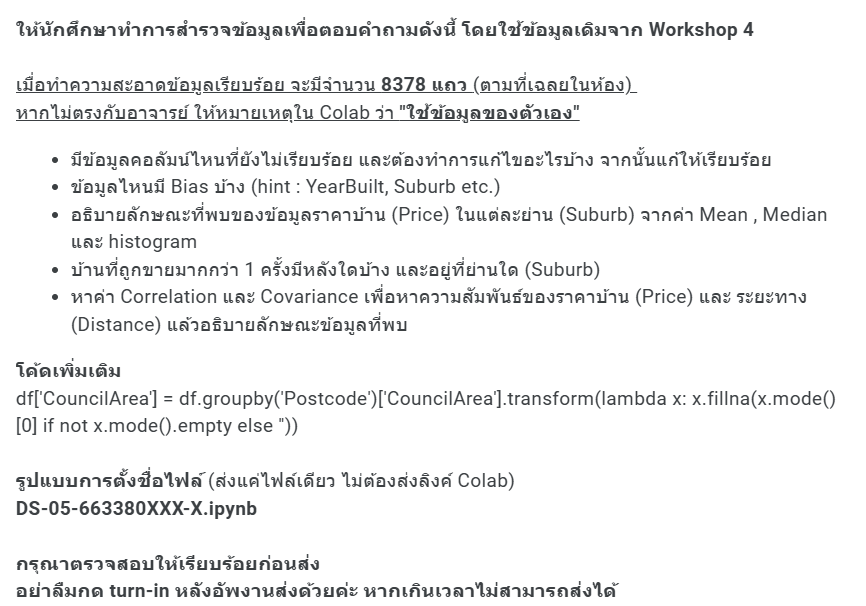

# **ใช้ข้อมูลตัวเอง**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [13]:
df_merge = pd.read_csv('Lab_05_merge_data.csv')
df = df_merge.copy()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9818 entries, 0 to 9817
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sale_no       9818 non-null   int64  
 1   Address       9818 non-null   object 
 2   Price         9818 non-null   float64
 3   Distance      9818 non-null   float64
 4   Landsize      9818 non-null   float64
 5   BuildingArea  9818 non-null   float64
 6   Type          9818 non-null   object 
 7   Method        9818 non-null   object 
 8   Suburb        9818 non-null   object 
 9   Postcode      9818 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 767.2+ KB


In [15]:
df.head(5)

,sale_no,Address,Price,Distance,Landsize,BuildingArea,Type,Method,Suburb,Postcode
0,1,85 TURNER ST,1480000.0,2.5,202.0,105.725,h,S,ABBOTSFORD,3067
1,2,25 BLOOMBURG ST,1035000.0,2.5,156.0,79.000,h,S,ABBOTSFORD,3067
2,3,5 CHARLES ST,1465000.0,2.5,134.0,150.000,h,SP,ABBOTSFORD,3067
3,4,40 FEDERATION LA,850000.0,2.5,94.0,105.725,h,PI,ABBOTSFORD,3067
4,5,55A PARK ST,1600000.0,2.5,120.0,142.000,h,VB,ABBOTSFORD,3067


## 1.ข้อมูลไหนมี Bias บ้าง (hint : YearBuilt, Suburb etc.)

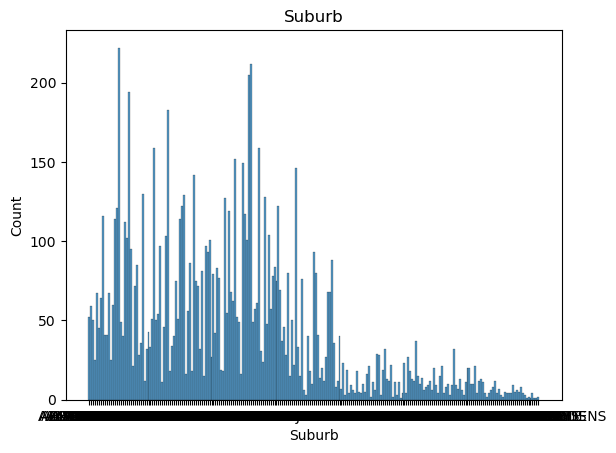

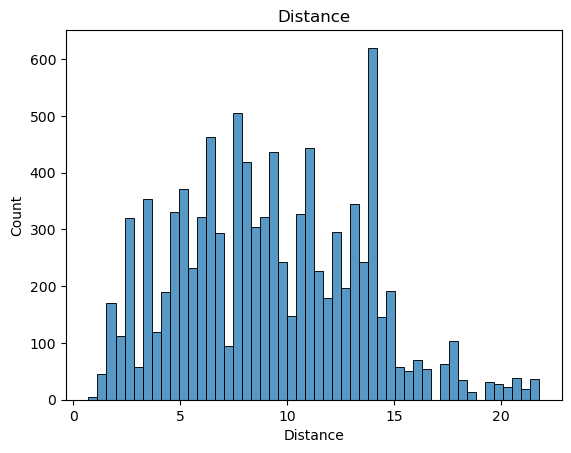

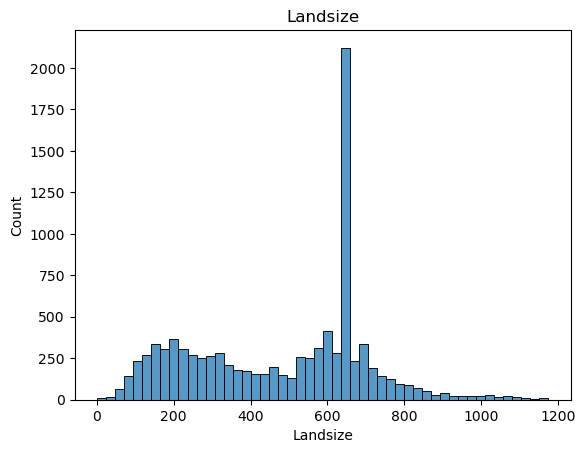

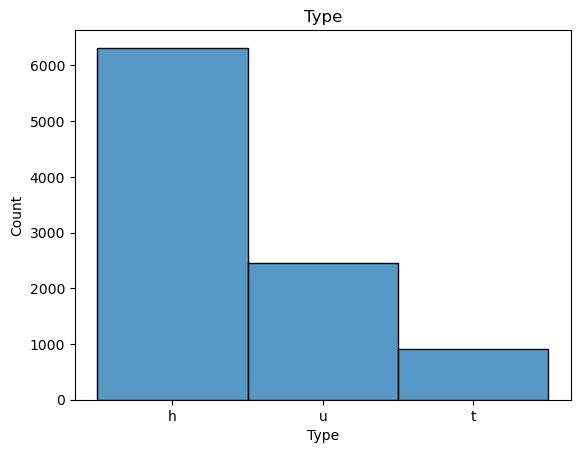

In [16]:
df_house = df[['Address','Suburb','Distance','Landsize','Type']]
df_house = df_house.drop_duplicates(['Address','Suburb','Distance','Landsize','Type'])
for i in df_house.iloc[:,1:].columns:
    sns.histplot(df_house[i], bins = 50)
    plt.title(i)
    plt.show()

In [17]:
df.head(1)

,sale_no,Address,Price,Distance,Landsize,BuildingArea,Type,Method,Suburb,Postcode
0,1,85 TURNER ST,1480000.0,2.5,202.0,105.725,h,S,ABBOTSFORD,3067


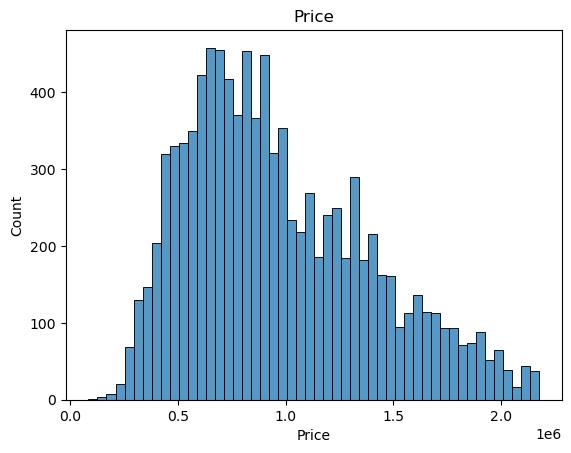

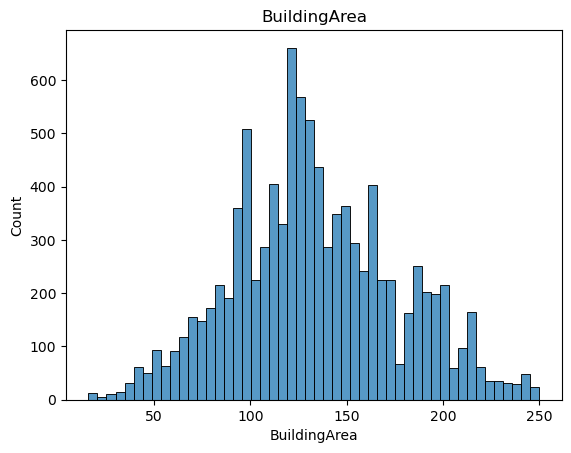

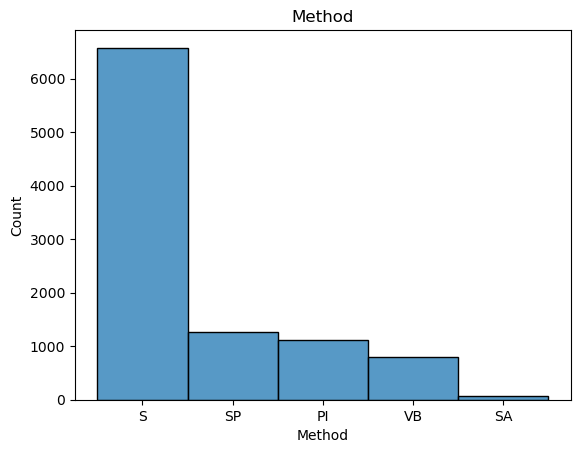

In [18]:
df_sale = df[['sale_no', 'Price', 'BuildingArea', 'Method']]
df_sale = df_sale.drop_duplicates(['sale_no'])
for i in df_sale.iloc[:,1:].columns:
    sns.histplot(df_sale[i], bins = 50)
    plt.title(i)
    plt.show()

##### จากการสังเกต :
##### ข้อมูลบ้านอาจมี bias จาก Landsize ที่ส่วนใหญ่อยู่ในช่วงระหว่าง 600-700
##### ข้อมูลการขายอาจมี bias จาก Method ที่ส่วนใหญ่เป็น S
##### ---------------------------------------------------------------------------------------------------------------

## 2. อธิบายลักษณะที่พบของข้อมูลราคาบ้าน (Price) ในแต่ละย่าน (Suburb) จากค่า Mean , Median และ histogram

In [19]:
df_price_suburb = df[['Suburb', 'Price']]

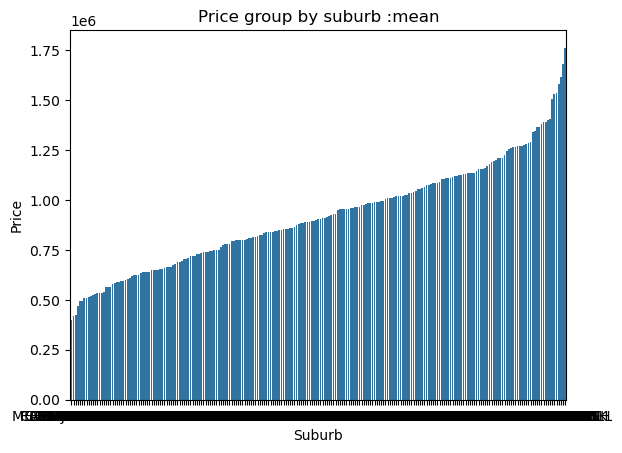

In [20]:
df_suburb_price_mean = df_price_suburb.groupby('Suburb')['Price'].mean().sort_values()
sns.barplot(x=df_suburb_price_mean.index,y=df_suburb_price_mean)
plt.title('Price group by suburb :mean')
plt.show()

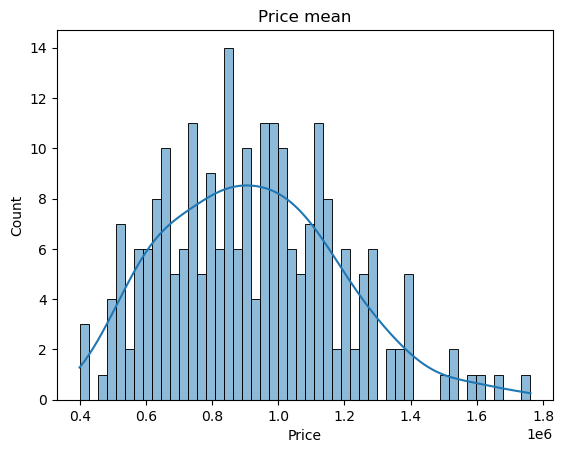

In [36]:
sns.histplot(df_suburb_price_mean, bins = 50, kde=True)
plt.title('Price mean')
plt.show()

In [21]:
print((df_suburb_price_mean[df_suburb_price_mean.isin(df_suburb_price_mean.quantile([0,0.5,1]))]))


Suburb
DALLAS          3.995000e+05
VIEWBANK        9.027095e+05
PRINCES HILL    1.762000e+06
Name: Price, dtype: float64


##### จากข้อมูล Price เฉลี่ยในแต่ละ Suburb แล้ว :
##### ราคาต่ำสุดอยู่ที่ DALLAS 399,500
##### ราคามัธยฐานอยู่ที่ VIEWBANK 902,709.5
##### ราตาสูงสุดอยู่ที่ PRINCES HILL 1,762,000


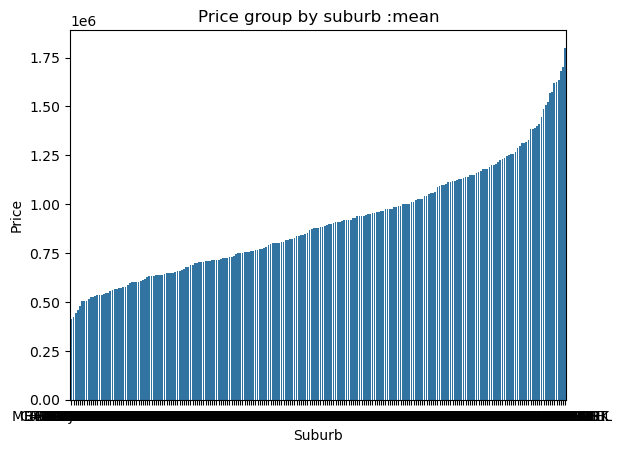

In [23]:
df_suburb_price_median = df_price_suburb.groupby('Suburb')['Price'].median().sort_values()
sns.barplot(x=df_suburb_price_median.index,y=df_suburb_price_median)
plt.title('Price group by suburb :mean')
plt.show()

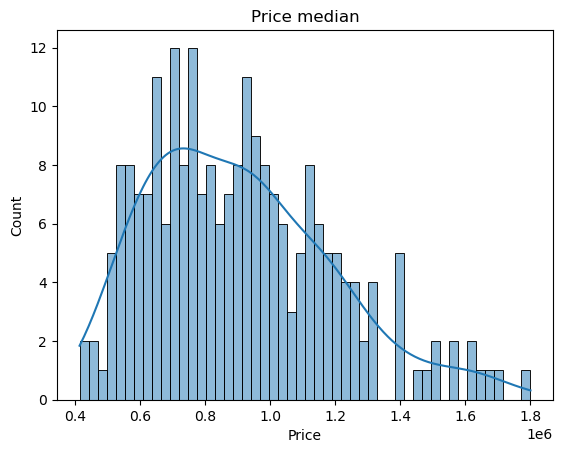

In [37]:
sns.histplot(df_suburb_price_median, bins = 50, kde=True)
plt.title('Price median')
plt.show()

In [24]:
print((df_suburb_price_median[df_suburb_price_median.isin(df_suburb_price_median.quantile([0,0.5,1]))]))

Suburb
DALLAS           414500.0
MULGRAVE         880000.0
PRINCES HILL    1800000.0
Name: Price, dtype: float64


##### จากข้อมูล Price มัธยฐานในแต่ละ Suburb แล้ว :
##### ราคาต่ำสุดอยู่ที่ DALLAS 414,500
##### ราคามัธยฐานอยู่ที่ MULGRAVE 880,000
##### ราตาสูงสุดอยู่ที่ PRINCES HILL 1,800,000

##### ---------------------------------------------------------------------------------------------------------------

## 3. บ้านที่ถูกขายมากกว่า 1 ครั้งมีหลังใดบ้าง และอยู่ที่ย่านใด (Suburb) 

In [32]:
df_house_more_than1 = df[['sale_no','Address', 'Suburb']]
fil = df_house_more_than1.duplicated('Address', keep=False)
df_house_more_than1 = df_house_more_than1[fil]
df_house_more_than1 = df_house_more_than1.sort_values('Address')
df_house_more_than1
print('House was sold than 1 time have total :',df_house_more_than1['Address'].nunique(), 'Houses \nFor example :')
print(df_house_more_than1['Address'].unique()[:10])
print("_"*100)
print('Suburb that has house was sold than 1 time have total :',df_house_more_than1['Suburb'].nunique(), 'Suburbans \nFor example :')
print(df_house_more_than1['Suburb'].unique()[:10])

,sale_no,Address,Suburb
4256,4959,1 BELLARINE ST,PRESTON
7771,9282,1 BELLARINE ST,PRESTON
7668,9145,1 DAISY ST,ESSENDON
6585,7803,1 DAISY ST,ESSENDON
8892,10733,1/1 CLARENDON ST,MAIDSTONE
...,...,...,...
8839,10664,9/44 FLETCHER ST,ESSENDON
9143,11070,97 EDWIN ST,HEIDELBERG HEIGHTS
2756,3228,97 EDWIN ST,HEIDELBERG HEIGHTS
5733,6836,99 NEILL ST,CARLTON


##### ---------------------------------------------------------------------------------------------------------------

## 4. หาค่า Correlation และ Covariance เพื่อหาความสัมพันธ์ของราคาบ้าน (Price) และ ระยะทาง (Distance) แล้วอธิบายลักษณะข้อมูลที่พบ

In [26]:
Cov_corr = df[['Distance', 'Price']]

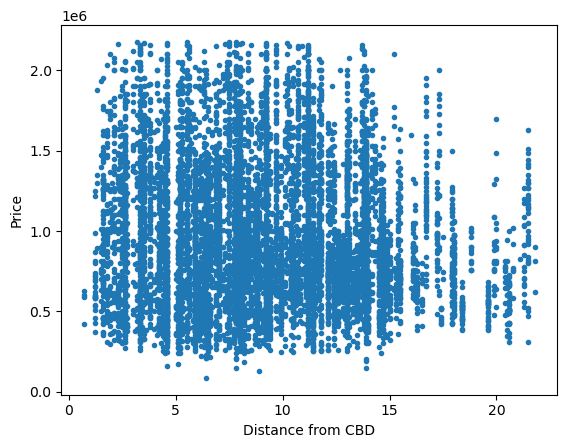

In [27]:
plt.scatter(Cov_corr['Distance'], Cov_corr['Price'], marker='.')
plt.xlabel('Distance from CBD')
plt.xticks(minor=False)
plt.ylabel('Price')
plt.show()

In [28]:
np.cov(Cov_corr['Distance'], Cov_corr['Price'])

array([[ 1.79321964e+01, -1.85220889e+05],
       [-1.85220889e+05,  1.82601506e+11]])

In [29]:
np.corrcoef(Cov_corr['Distance'], Cov_corr['Price'])

array([[ 1.        , -0.10235782],
       [-0.10235782,  1.        ]])

##### จากการหาค่า cov, corr :
##### cov = -185220
##### corr = -0.102
##### แสดงให้เห็นถึง Distance from CBD และ Price นั้นสัมพันธ์กันทางลบน้อยมาก
##### ---------------------------------------------------------------------------------------------------------------